# COVID-19 AUSTRIA GRAPHS

In [1]:
import sys
import os
from osgeo import ogr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

In [2]:
qgis_path = r"C:\OSGeo4W64\apps\qgis"
QgsApplication.setPrefixPath(qgis_path, True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r"C:\OSGeo4W64\apps\qgis\python\plugins")
project = QgsProject.instance()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:\OSGeo4W64\apps\qgis/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/Marcelo/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/Marcelo/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [3]:
import urllib.request
url = 'https://data.biogeo.ucdavis.edu/data/diva/adm/AUT_adm.zip'
filename = 'map/AUT_adm.zip'
urllib.request.urlretrieve(url, filename)

('map/AUT_adm.zip', <http.client.HTTPMessage at 0x19aef0cb198>)

In [4]:
import zipfile
filename = 'map/AUT_adm.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('map')

In [5]:
path = "map/AUT_adm1.shp"
map_layer = QgsVectorLayer(path, 'AUSTRIA map', 'ogr')

pr = map_layer.dataProvider() # need to create a data provider
pr.addAttributes([QgsField("",  QVariant.Int)]) # define/add field data type
map_layer.updateFields()

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


Download csv file

In [6]:
#import urllib.request
#url = 'https://raw.githubusercontent.com/covid19-eu-zh/covid19-eu-data/master/dataset/covid-19-at.csv'
#filename = 'covid_data/covid-19-at.csv'
#urllib.request.urlretrieve(url, filename)

Get most recent data from csv file

In [7]:
import csv
import datetime
from datetime import date

today = date.today()
today = today.strftime("%y-%m-%d")
print("Today's date:", today)

safe_date = date.today()-datetime.timedelta(2)
safe = safe_date.strftime("%y-%m-%d")
print("Safe date:", safe)

date_time_str = '2018-06-29T08:15:27'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S')

with open('covid_data/covid-19-at.csv', 'r') as i, open('covid_data/covid-19-austria.csv', 'w', newline='') as o:
    r = csv.reader(i, delimiter=',')
    writer = csv.writer(o)
    writer.writerow(["country", "name", "cases", "recovered", "deaths", "tests", "hospitalized", "intensive_care", "datetime"])
    #for row in r:
    #    if row[8] == "2020-05-09T15:00:00": 
    #        writer.writerow(row)
    #        print(row)
    max_value = date_time_obj
    #most recent date
    for row in r:
        if today in row[8]:
            date_time = row[8]
            date_time_object = datetime.datetime.strptime(date_time, '%Y-%m-%dT%H:%M:%S')
            if date_time_object > max_value: 
                max_value = date_time_object
    print("Most recent date: ", max_value)
    
                
                
                
with open('covid_data/covid-19-at.csv', 'r') as i, open('covid_data/covid-19-austria.csv', 'w', newline='') as o:
    r = csv.reader(i, delimiter=',')
    writer = csv.writer(o)
    writer.writerow(["country", "name", "cases", "recovered", "deaths", "tests", "hospitalized", "intensive_care", "datetime"])
                
    #create csv with most recent data           
    for row in r:
        if today in row[8]:
            date_time = row[8]
            date_time_object = datetime.datetime.strptime(date_time, '%Y-%m-%dT%H:%M:%S')
            if date_time_object == max_value: 
                writer.writerow(row)
                print(row)    
        

        

Today's date: 20-05-31
Safe date: 20-05-29
Most recent date:  2018-06-29 08:15:27


In [8]:
csv_path = "file:covid_data/covid-19-austria.csv?delimiter=(',')"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


In [9]:
joinName = 'name'
targetName = 'NAME_1'

joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

## Data in Graphs

In [10]:
dict = []

for feature in map_layer.getFeatures():
    if feature['NAME_1']:
        state = feature['NAME_1']
        if feature['Data_deaths']:
            death = feature['Data_deaths']
        else:
            death = 0
        if feature['Data_cases']:
            confirmed = feature['Data_cases']
        else:
            confirmed = 0
        if feature['Data_recovered']:
            recovered = feature['Data_recovered']
        else:
            recovered = 0
        if feature['Data_tests']:
            tests = feature['Data_tests']
        else:
            tests = 0
        if feature['Data_hospitalized']:
            hospitalized = feature['Data_hospitalized']
        else:
            hospitalized = 0
        if feature['Data_intensive_care']:
            intensive_care = feature['Data_intensive_care']
        else:
            intensive_care = 0
        
    e = {'Name': state, 'Confirmed': confirmed, 'Death': death, 'Recovered': recovered, 'Tests': tests, 'Hospitalized': hospitalized, 'Intensive Care': intensive_care }
    dict.append(e)

In [11]:
size = len(dict)-5

c = sorted(dict, key = lambda i: i['Confirmed'],reverse=True)
d = sorted(dict, key = lambda i: i['Death'],reverse=True)
r = sorted(dict, key = lambda i: i['Recovered'],reverse=True)
t = sorted(dict, key = lambda i: i['Tests'],reverse=True)
h = sorted(dict, key = lambda i: i['Hospitalized'],reverse=True)
i = sorted(dict, key = lambda i: i['Intensive Care'],reverse=True)

top5confirmed = c[0:5]
top5death = d[0:5]
top5recovered = r[0:5]
top5tests = t[0:5]
top5hospitalized = h[0:5]
top5intensive_care = i[0:5]

bottom5confirmed = c[size:]
bottom5death = d[size:]
bottom5recovered = r[size:]
bottom5tests = r[size:]
bottom5hospitalized = h[size:]
bottom5intensive_care = i[size:]


### Top 5 Cases Confirmed

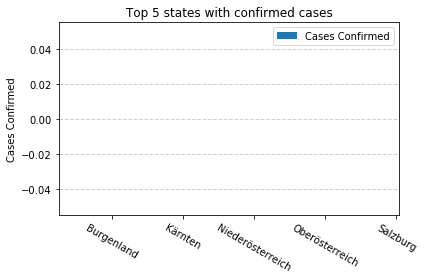

In [12]:
delta1 = [c[0]['Confirmed'],c[1]['Confirmed'],c[2]['Confirmed'],c[3]['Confirmed'],c[4]['Confirmed']]
states = [c[0]['Name'],c[1]['Name'],c[2]['Name'],c[3]['Name'],c[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, align='center', label='Cases Confirmed')


plt.ylabel('Cases Confirmed')
plt.title('Top 5 states with confirmed cases')
plt.xticks(index + bar_width,states, rotation=-30)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_cases_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()



### Bottom 5 Cases Confirmed

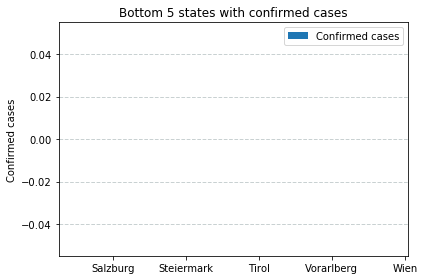

In [13]:
delta1 = [bottom5confirmed[0]['Confirmed'],bottom5confirmed[1]['Confirmed'],bottom5confirmed[2]['Confirmed'],bottom5confirmed[3]['Confirmed'],bottom5confirmed[4]['Confirmed']]
states = [bottom5confirmed[0]['Name'],bottom5confirmed[1]['Name'],bottom5confirmed[2]['Name'],bottom5confirmed[3]['Name'],bottom5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Confirmed cases')

plt.ylabel('Confirmed cases')
plt.title('Bottom 5 states with confirmed cases')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_cases_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Top 5 Deaths

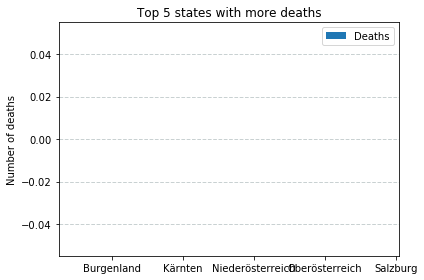

In [14]:
delta1 = [top5death[0]['Death'],top5death[1]['Death'],top5death[2]['Death'],top5death[3]['Death'],top5death[4]['Death']]
states = [top5death[0]['Name'],top5death[1]['Name'],top5death[2]['Name'],top5death[3]['Name'],top5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths')

plt.ylabel('Number of deaths')
plt.title('Top 5 states with more deaths')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_deaths_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Bottom 5 Mortes

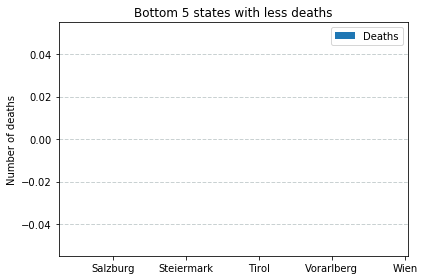

In [15]:
delta1 = [bottom5death[0]['Death'],bottom5death[1]['Death'],bottom5death[2]['Death'],bottom5death[3]['Death'],bottom5death[4]['Death']]
states = [bottom5death[0]['Name'],bottom5death[1]['Name'],bottom5death[2]['Name'],bottom5death[3]['Name'],bottom5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths')

plt.ylabel('Number of deaths')
plt.title('Bottom 5 states with less deaths')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_deaths_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Top 5 Recovered cases

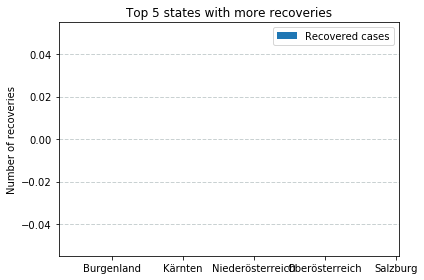

In [16]:
delta1 = [top5recovered[0]['Recovered'],top5recovered[1]['Recovered'],top5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [top5recovered[0]['Name'],top5recovered[1]['Name'],top5recovered[2]['Name'],top5recovered[3]['Name'],top5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Recovered cases')

plt.ylabel('Number of recoveries')
plt.title('Top 5 states with more recoveries')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_recovered.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Bottom 5 Recovered Cases

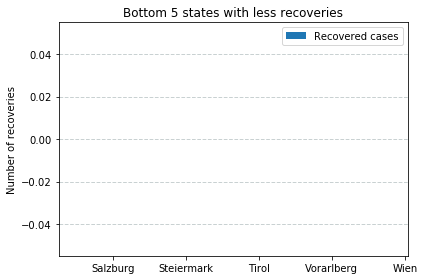

In [17]:
delta1 = [bottom5recovered[0]['Recovered'],bottom5recovered[1]['Recovered'],bottom5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [bottom5recovered[0]['Name'],bottom5recovered[1]['Name'],bottom5recovered[2]['Name'],bottom5recovered[3]['Name'],bottom5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Recovered cases')

plt.ylabel('Number of recoveries')
plt.title('Bottom 5 states with less recoveries')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_recovered.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Top 5 Tests

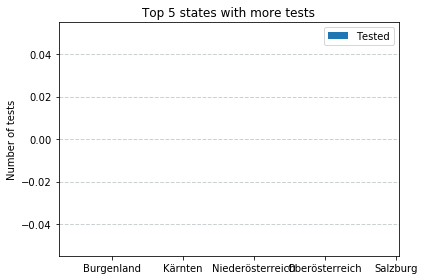

In [18]:
delta1 = [top5tests[0]['Tests'],top5tests[1]['Tests'],top5tests[2]['Tests'],top5tests[3]['Tests'],top5tests[4]['Tests']]
states = [top5tests[0]['Name'],top5tests[1]['Name'],top5tests[2]['Name'],top5tests[3]['Name'],top5tests[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Tested')

plt.ylabel('Number of tests')
plt.title('Top 5 states with more tests')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_tests.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Bottom 5 Tests

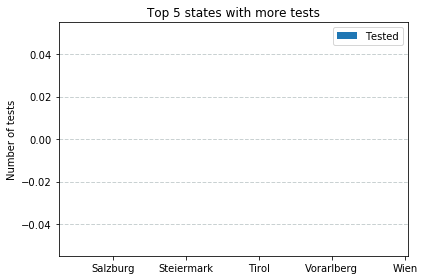

In [19]:
delta1 = [bottom5tests[0]['Tests'],bottom5tests[1]['Tests'],bottom5tests[2]['Tests'],bottom5tests[3]['Tests'],bottom5tests[4]['Tests']]
states = [bottom5tests[0]['Name'],bottom5tests[1]['Name'],bottom5tests[2]['Name'],bottom5tests[3]['Name'],bottom5tests[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Tested')

plt.ylabel('Number of tests')
plt.title('Top 5 states with more tests')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_tests.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

## Deaths in AUSTRIA by state

In [20]:
# Import Data
df = pd.read_csv("covid_data/covid-19-austria.csv")

print(df.sort_values('cases', ascending=False))
df2 = df[['name','deaths']]
print(df[['name','deaths']])
print(df2['name'])

Empty DataFrame
Columns: [country, name, cases, recovered, deaths, tests, hospitalized, intensive_care, datetime]
Index: []
Empty DataFrame
Columns: [name, deaths]
Index: []
Series([], Name: name, dtype: object)


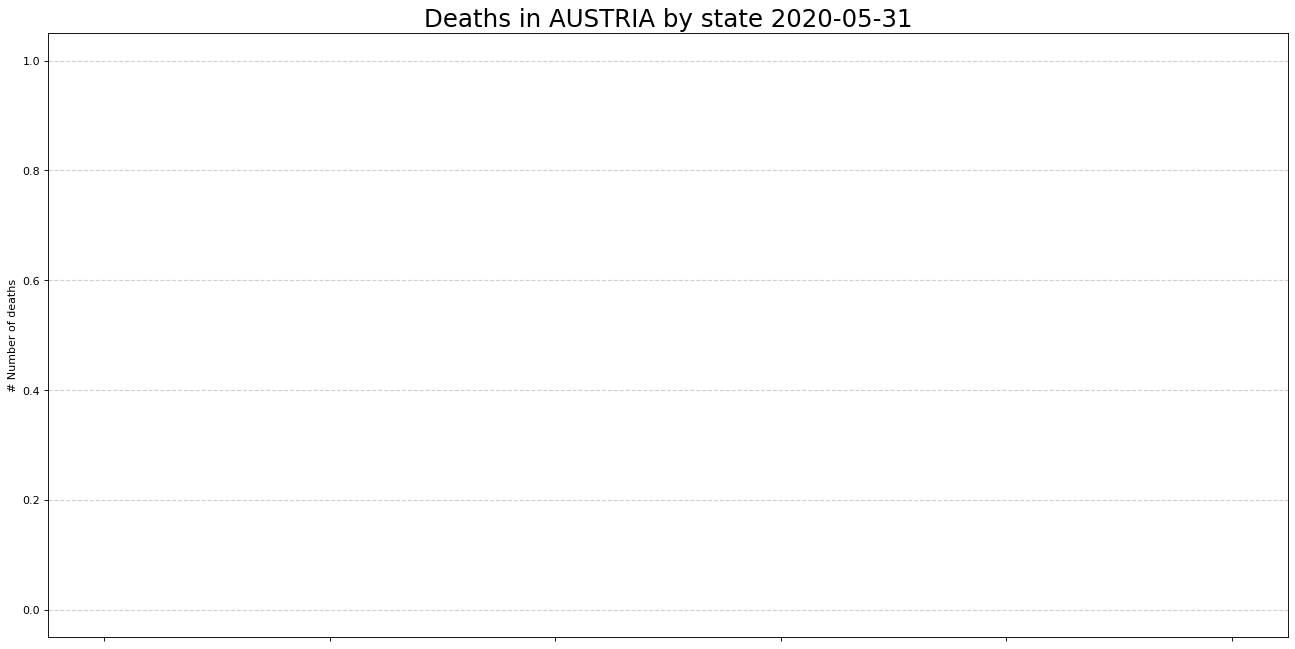

In [21]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','deaths']]
n = df['deaths'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['deaths'].tolist()[0:9]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Deaths in AUSTRIA by state "+date.today().strftime("%Y-%m-%d"), fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/deaths.png', dpi=300, format='png')
plt.show()

## Confirmed cases in AUSTRIA by state

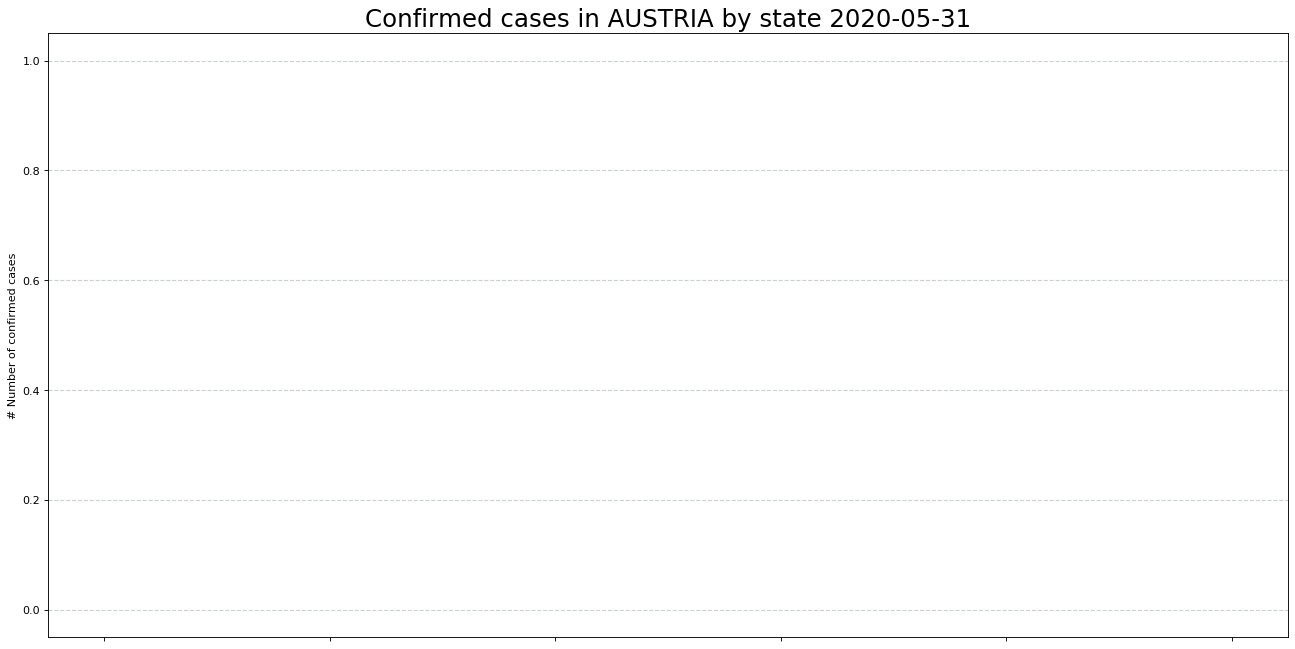

In [22]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','cases']]
n = df['cases'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['cases'].tolist()[0:9]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Confirmed cases in AUSTRIA by state "+date.today().strftime("%Y-%m-%d"), fontsize=22)
plt.ylabel('# Number of confirmed cases')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/confirmed_cases.png', dpi=300, format='png')
plt.show()

## Recoveries in AUSTRIA by state

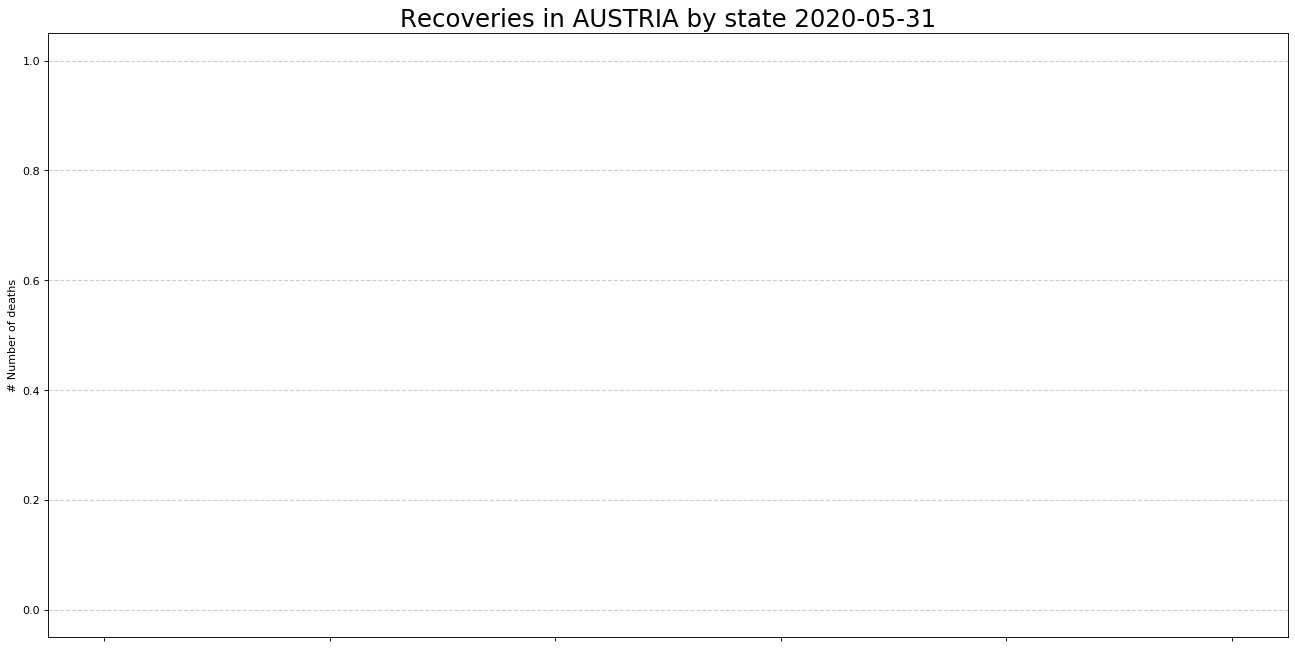

In [23]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','recovered']]
n = df['recovered'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['recovered'].tolist()[0:9]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Recoveries in AUSTRIA by state "+date.today().strftime("%Y-%m-%d"), fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/confirmed_cases.png', dpi=300, format='png')
plt.show()

## Hospitalizations in AUSTRIA by state

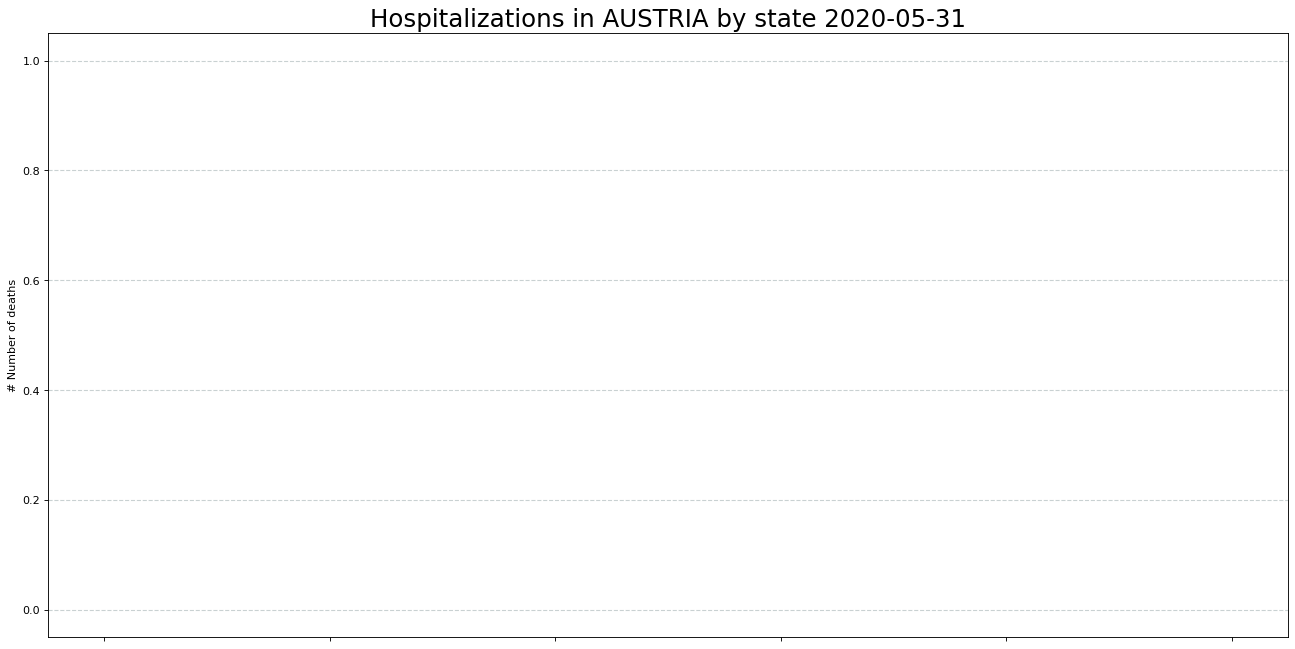

In [24]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','hospitalized']]
n = df['hospitalized'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['hospitalized'].tolist()[0:9]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Hospitalizations in AUSTRIA by state "+date.today().strftime("%Y-%m-%d"), fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/hospitalized.png', dpi=300, format='png')
plt.show()

## Intesive Care in AUSTRIA by state

Empty DataFrame
Columns: [name, intensive_care]
Index: []
[]


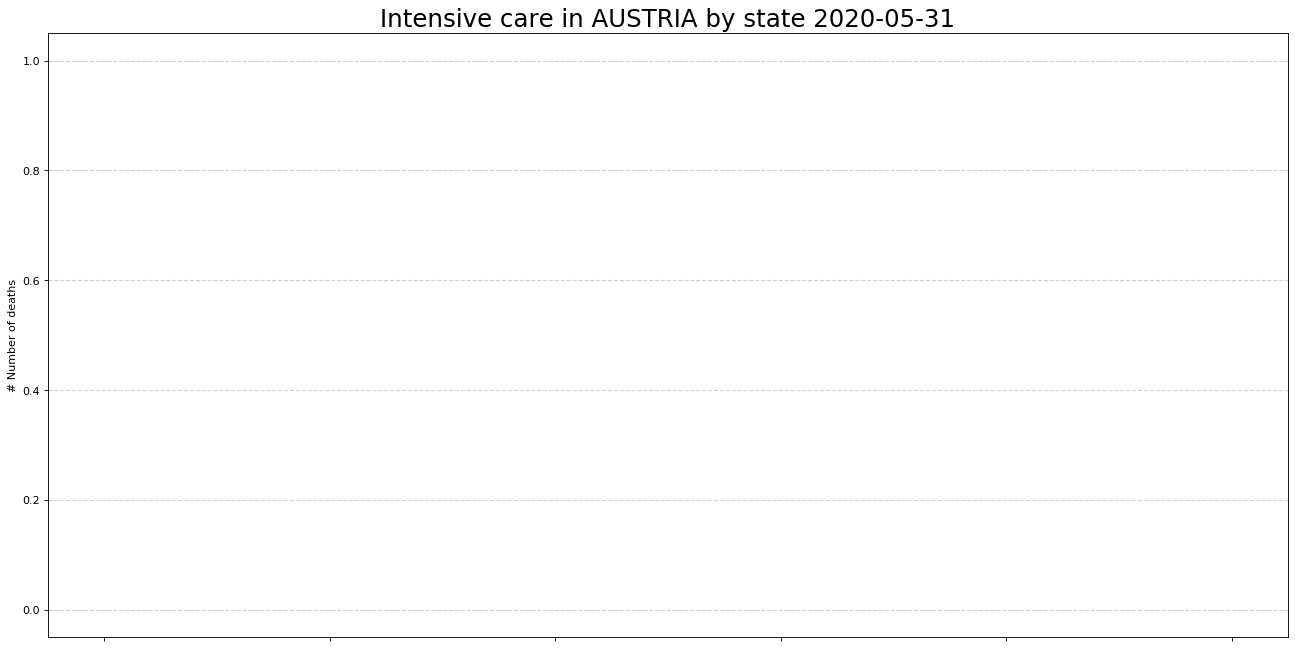

In [25]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','intensive_care']]
print(df)
n = df['intensive_care'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['intensive_care'].tolist()[0:9]

print(y)

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Intensive care in AUSTRIA by state "+date.today().strftime("%Y-%m-%d"), fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/hospitalized.png', dpi=300, format='png')
plt.show()

In [26]:
# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

# Prepare Data

name = df_raw['name'].tolist()[0:9]
intensive_care = df_raw['intensive_care'].tolist()[0:9]
cases = df_raw['cases'].tolist()[0:9]
deaths = df_raw['deaths'].tolist()[0:9]
recovered = df_raw['recovered'].tolist()[0:9]
hospitalized = df_raw['hospitalized'].tolist()[0:9]
tests = df_raw['tests'].tolist()[0:9]

In [27]:

 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = cases
bars2 = deaths
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis

 
# Names of group and bar width
names = name
barWidth = 0.75


plt.figure(figsize=(20,10), dpi= 80)

plt.bar(names, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(names, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
 

 
# Show graphic
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Intensive care in AUSTRIA by state "+date.today().strftime("%Y-%m-%d"), fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/hospitalized.png', dpi=300, format='png')
plt.show()

NameError: name 'rc' is not defined

In [ ]:
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = cases
bars2 = deaths
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis

 
# Names of group and bar width
names = name
barWidth = 0.75


plt.figure(figsize=(20,10), dpi= 80)

plt.bar(names, bars1, bottom=bars2, color='#08a8ed', edgecolor='white', width=barWidth)
plt.bar(names, bars2, color='#ed0808', edgecolor='white', width=barWidth)
 
for i, val in enumerate(bars2):
    plt.text(i, val, int(val), horizontalalignment='center', fontdict={'fontweight':500, 'size':15})

for i, val in enumerate(bars1):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='top', fontdict={'fontweight':500, 'size':15})
 
    
# Show graphic
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Cases confirmed vs Deaths "+date.today().strftime("%Y-%m-%d"), fontsize=22)
plt.ylabel('Number of cases: blue VS. Number of deaths: red')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/cases_vs_deaths.png', dpi=300, format='png')
plt.show()

In [ ]:
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = cases
bars2 = recovered
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis

 
# Names of group and bar width
names = name
barWidth = 0.75


plt.figure(figsize=(20,10), dpi= 80)

plt.bar(names, bars1, color='#ed0808', edgecolor='white', width=barWidth)
plt.bar(names, bars2, bottom=bars1, color='#08a8ed', edgecolor='white', width=barWidth)
 
# Show graphic
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Cases confirmed vs Recoveries "+date.today().strftime("%Y-%m-%d"), fontsize=22)
plt.ylabel('Number of cases: blue VS. Number of recoveries: red')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/cases_vs_deaths.png', dpi=300, format='png')
plt.show()